In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Convolution2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#val_data=keras.utils.image_dataset_from_directory(
#directory="E:\DSspec\Internship\CUB-200-2011\cub_200_2011_64x64_for_fid_10k\cub_200_2011_64x64_10k"
#label="inferred",
#label_mode="int",
#batch_size=32,
#iamge_size=(256,256)
#)

In [3]:
train=keras.utils.image_dataset_from_directory(directory="E:\\DSspec\\Internship\\CUB-200-2011\\cub_200_2011_64x64_for_fid_10k",
                                             labels="inferred",
                                             validation_split=0.2,
                                             subset="training",
                                             seed=1337,
                                             label_mode="int",
                                             batch_size=32,
                                             image_size=(256,256))

Found 10000 files belonging to 1 classes.
Using 8000 files for training.


In [4]:
test=keras.utils.image_dataset_from_directory(directory="E:\\DSspec\\Internship\\CUB-200-2011\\cub_200_2011_64x64_for_fid_10k",
                                             labels="inferred",
                                             validation_split=0.2,
                                             subset="validation",
                                             seed=1337,
                                             label_mode="int",
                                             batch_size=32,
                                             image_size=(256,256))

Found 10000 files belonging to 1 classes.
Using 2000 files for validation.


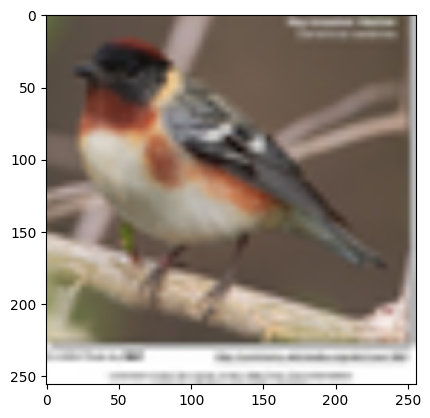

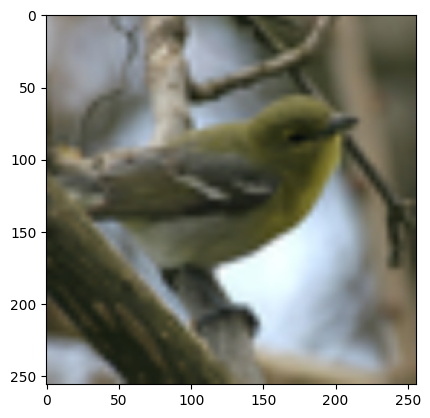

In [5]:
for image,label in train.take(2):
    plt.imshow(image[31].numpy().astype("uint8"))
    plt.show()

In [8]:
from tensorflow.keras import layers 
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(256, 256, 3)),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
  ]
)

In [9]:
train_gen = train.map(lambda x, y: (data_augmentation(x, training=True), y))